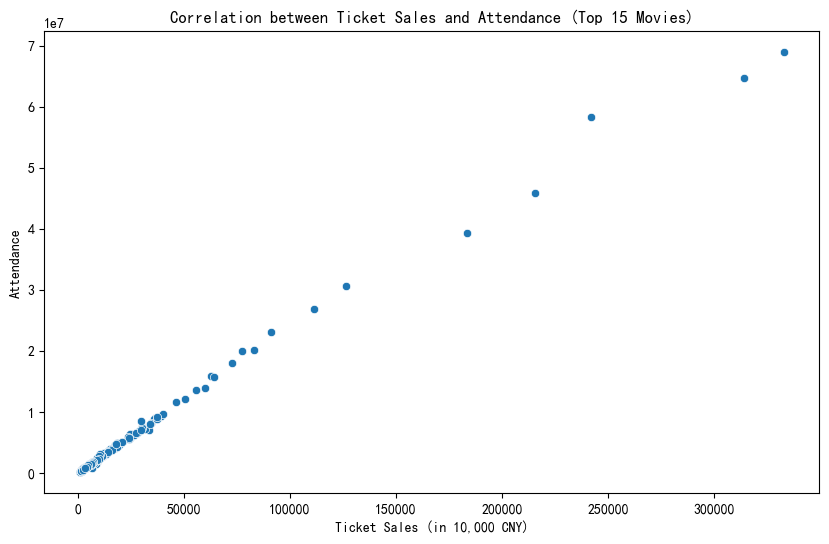

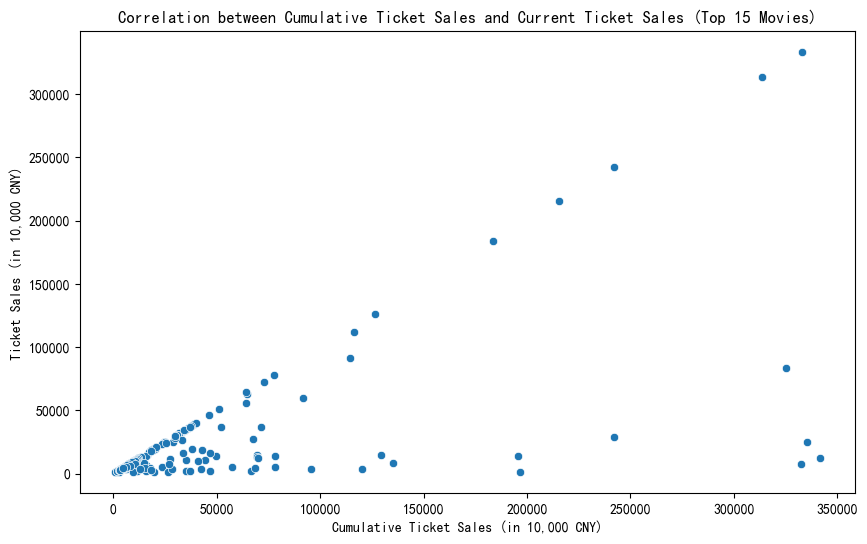

C:\Users\123\AppData\Local\Temp\ipykernel_15364\1156107805.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=province_summary, x='ticket_sales_per_person', y='省区市', palette='coolwarm')


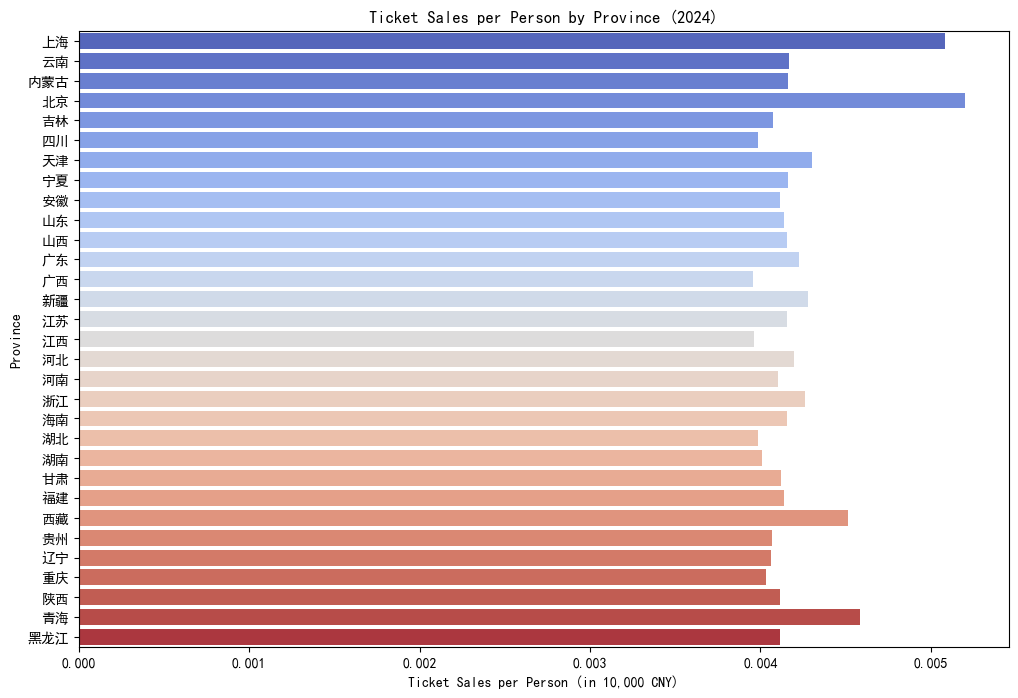

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Map

# 1. 数据加载
# 请将路径替换为你的实际数据文件路径
province_rank_df = pd.read_csv('data/cleaned_Province_Rank.csv')  # 替换为实际路径
top15_movies_df = pd.read_csv('data/cleaned_top15_movies.csv')  # 替换为实际路径

# 2. 数据预处理
# 统一时间格式
province_rank_df['统计时间'] = pd.to_datetime(province_rank_df['统计时间'], format='%b-%y')
top15_movies_df['统计时间'] = pd.to_datetime(top15_movies_df['统计时间'], format='%b-%y')

# 汇总数据：按省级汇总票房、人次和场次
province_summary = province_rank_df.groupby('省区市').agg(
    total_ticket_sales=('票房（万元）', 'sum'),
    total_screenings=('场次', 'sum'),
    total_attendance=('人次', 'sum')
).reset_index()

# 3. 绘制中国省份票房差异的地图
# 数据清洗：匹配省区市名称与pyecharts需要的省份名称
province_summary['省区市'] = province_summary['省区市'].apply(lambda x: x.strip())

# 将数据准备为pyecharts所需的格式
data = [(row['省区市'], row['total_ticket_sales']) for index, row in province_summary.iterrows()]

# 使用pyecharts绘制地图
map_chart = (
    Map()
    .add("票房（万元）", data, "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2024年中国电影票房分布"),
        visualmap_opts=opts.VisualMapOpts(min_=0, max_=province_summary['total_ticket_sales'].max(), is_piecewise=True),
    )
)

# 渲染并显示地图
map_chart.render_notebook()

# 4. 票房与人次的关系分析
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top15_movies_df, x='票房（万元）', y='人次')
plt.title('Correlation between Ticket Sales and Attendance (Top 15 Movies)')
plt.xlabel('Ticket Sales (in 10,000 CNY)')
plt.ylabel('Attendance')
plt.show()

# 5. 累计票房与当前票房的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top15_movies_df, x='累计票房（万元）', y='票房（万元）')
plt.title('Correlation between Cumulative Ticket Sales and Current Ticket Sales (Top 15 Movies)')
plt.xlabel('Cumulative Ticket Sales (in 10,000 CNY)')
plt.ylabel('Ticket Sales (in 10,000 CNY)')
plt.show()

# 6. 显示每个省的消费能力（票房/人次）
province_summary['ticket_sales_per_person'] = province_summary['total_ticket_sales'] / province_summary['total_attendance']
plt.figure(figsize=(12, 8))
sns.barplot(data=province_summary, x='ticket_sales_per_person', y='省区市', palette='coolwarm')
plt.title('Ticket Sales per Person by Province (2024)')
plt.xlabel('Ticket Sales per Person (in 10,000 CNY)')
plt.ylabel('Province')
plt.show()


In [22]:
from pyecharts import options as opts
from pyecharts.charts import Map
import pandas as pd

# 1. 数据加载
province_rank_df = pd.read_csv('data/cleaned_Province_Rank.csv')  # 请替换为正确路径

# 2. 数据预处理
province_rank_df['统计时间'] = pd.to_datetime(province_rank_df['统计时间'], format='%b-%y')

# 按省区市和月份排序，并计算累计票房
province_rank_df = province_rank_df.sort_values(by=['省区市', '统计时间'])

# 计算累计票房
province_rank_df['累计票房（万元）'] = province_rank_df.groupby('省区市')['票房（万元）'].cumsum()

# 3. 按省区市汇总数据：计算每个省的累计票房总和
province_summary = province_rank_df.groupby('省区市').agg(
    total_ticket_sales=('累计票房（万元）', 'max')  # 取每个省最后一个月的累计票房
).reset_index()

# 4. 数据清洗：去除省区市名称中的“省”字样并匹配pyecharts标准格式
province_summary['省区市'] = province_summary['省区市'].apply(lambda x: x.strip())

# 更新省份名称，将省份名调整为pyecharts中标准的名称（加上“省”或“市”）
province_name_mapping = {
    '北京': '北京市', '天津': '天津市', '上海': '上海市', '重庆': '重庆市',
    '河北': '河北省', '河南': '河南省', '云南': '云南省', '辽宁': '辽宁省',
    '黑龙江': '黑龙江省', '江苏': '江苏省', '浙江': '浙江省', '安徽': '安徽省',
    '福建': '福建省', '江西': '江西省', '山东': '山东省', '湖北': '湖北省',
    '湖南': '湖南省', '广东': '广东省', '广西': '广西壮族自治区', '海南': '海南省',
    '四川': '四川省', '贵州': '贵州省', '陕西': '陕西省', '甘肃': '甘肃省',
    '青海': '青海省', '宁夏': '宁夏回族自治区', '新疆': '新疆维吾尔自治区', '西藏': '西藏自治区',
    '内蒙古': '内蒙古自治区', '吉林': '吉林省', '山西': '山西省'
}

# 更新省区市名称以匹配pyecharts所需的格式
province_summary['省区市'] = province_summary['省区市'].map(province_name_mapping)

# 去掉无法匹配的省份（如果有）
province_summary = province_summary.dropna(subset=['省区市'])

# 查看是否有票房数据
print("票房数据：", province_summary[['省区市', 'total_ticket_sales']].head())

# 将数据准备为pyecharts所需的格式
data = [(row['省区市'], row['total_ticket_sales']) for index, row in province_summary.iterrows()]

# 使用pyecharts绘制地图
map_chart = (
    Map()
    .add("累计票房（万元）", data, "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2024年中国电影票房累计分布"),
        visualmap_opts=opts.VisualMapOpts(min_=0, max_=province_summary['total_ticket_sales'].max(), is_piecewise=True),
    )
)

# 保存为HTML文件并手动打开查看
map_chart.render('china_cumulative_ticket_sales_map11.html')


票房数据：       省区市  total_ticket_sales
0     上海市              215512
1     云南省               66103
2  内蒙古自治区               58019
3     北京市              209590
4     吉林省               59037


'C:\\Users\\123\\china_cumulative_ticket_sales_map11.html'